In [100]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

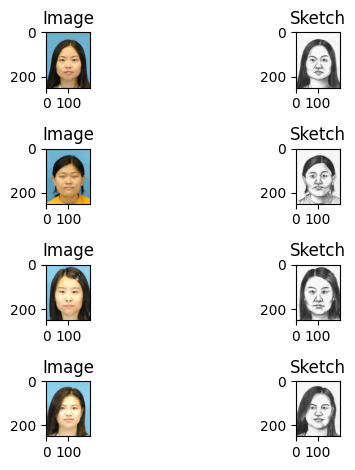

In [6]:
#for the CUHK dataset


#the image in the folders are not sorted correctly
#we need to sort them in order to retrieve the faces and the corresponding sketches

def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

photo_files = "./CUHK Face Sketch Database (CUFS)/photos"
sketch_files = "./CUHK Face Sketch Database (CUFS)/sketches"

photos = sorted_alphanumeric(os.listdir(photo_files))
sketches = sorted_alphanumeric(os.listdir(sketch_files))


#the paths have to be modified according to the user files
photos = ["./CUHK Face Sketch Database (CUFS)/photos"+"/"+ element for element in photos]
sketches = ["./CUHK Face Sketch Database (CUFS)/sketches" +"/"+ element for element in sketches]


#loading the iamge and transforming them into tensors
def load_data(path):
    image = tf.keras.utils.load_img(path)
    image = tf.keras.utils.img_to_array(image)
    image = image/255.
    return image

data_photo = []

for photo in photos :
    image = load_data(photo)
    data_photo.append(image)
    
data_sketch = []

for sketch in sketches: 
    image = load_data(sketch)
    data_sketch.append(image)

data_photo = np.array(data_photo)
data_sketch = np.array(data_sketch)


#construcing the dataset
#containing of photos and corresponding sketches
data = tf.data.Dataset.from_tensor_slices((data_photo, data_sketch))


#taking the first two elements of the dataset and displaying them
element = data.take(4)
fig, ax = plt.subplots(4,2)

for index,a in enumerate(element):
    ax[index][0].imshow(a[0].numpy())
    ax[index][1].imshow(a[1].numpy())

    ax[index][0].set_title("Image")
    ax[index][1].set_title("Sketch")
    
    
fig.tight_layout()

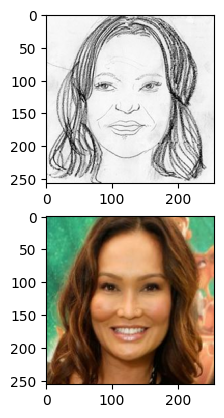

In [110]:
# for the fs2k dataset

#for file in os.listdir("./FS2K/sketch/sketch2"):
    #os.rename(os.path.join("./FS2K/sketch/sketch2",file), os.path.join("./FS2K/sketch/sketch2",file.split(".")[0]+".jpg"))
    
    
base_element = "./FS2K/"
    
def load_data(photo, sketch):
    
    
    image_photo = tf.io.read_file(photo)
    image_photo = tf.io.decode_jpeg(image_photo)
    
    
    image_sketch = tf.io.read_file(sketch)
    image_sketch = tf.io.decode_jpeg(image_sketch)
    
    image_sketch = tf.cast(image_sketch, tf.float32)
    image_photo  = tf.cast(image_photo, tf.float32)
    
    
    image_sketch = tf.image.resize(image_sketch, [256, 256],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    
    image_photo = tf.image.resize(image_photo, [256,256],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    return image_sketch, image_photo


photo_data_1 = tf.data.Dataset.list_files(base_element + "photo/photo1/*.jpg", shuffle=False)
photo_data_2 = tf.data.Dataset.list_files(base_element + "photo/photo2/*.jpg", shuffle=False)
photo_data_3 = tf.data.Dataset.list_files(base_element + "photo/photo3/*.jpg", shuffle=False)

sketch_data_1 = tf.data.Dataset.list_files(base_element + "sketch/sketch1/*.jpg", shuffle=False)
sketch_data_2 = tf.data.Dataset.list_files(base_element + "sketch/sketch2/*.jpg", shuffle=False)
sketch_data_3 = tf.data.Dataset.list_files(base_element + "sketch/sketch3/*.jpg", shuffle=False)

photo_data = photo_data_1.concatenate(photo_data_2)
photo_data = photo_data.concatenate(photo_data_3)

sketch_data = sketch_data_1.concatenate(sketch_data_2)
sketch_data = sketch_data.concatenate(sketch_data_3)

merged_data = tf.data.Dataset.zip((photo_data, sketch_data))

new_data = merged_data.map(load_data)

for element in new_data.take(1):
    
    fig, ax = plt.subplots(2,1)
    
    ax[0].imshow(element[0].numpy()/255.)
    ax[1].imshow(element[1].numpy()/255.)

In [104]:
print("this is cool")

this is cool
